# Predecir la cantidad de crímenes por día en Londres
- Serie de tiempo

### Autores
   * Merelyn Rodríguez Rojas

## Análisis del Problema
Londres es una ciudad muy grande y transitada, es una de las principales áreas metropolitanas por lo que es "común" saber que ocurren diferentes tipos de crímenes en ella, cada uno de estos con diferentes patrones. Se cuenta con un set de datos que cubren el número de denuncias penales por mes, con cada categoría mayor / menor desde enero de 2008 hasta diciembre de 2016.

Así pues, se espera predecir la contaaidad de crímenes que suceden en Londres por día.

![crimenes](https://ichef.bbci.co.uk/news/640/cpsprodpb/5A9F/production/_100699132_045934826-1.jpg)

## Librerías

In [102]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#from sklearn.linear_model import LinearRegression

## Entendimiento de los Datos

In [103]:
data = pd.read_csv('/content/london_crime_by_lsoa.csv')

El set de datos cuenta con 8295347 registro y 7 variables.
- lsoa_code: Código único.
- borough: Lugar donde sucedieron los crímenes.
- major_category: Descripción general.
- minor_category: Descripción más específica.
- value: Cantidad de crímenes de ese tipo.
- year: Mes.
- month: Año.

In [104]:
data

lsoa_code     borough  ...    year month
0        E01001116     Croydon  ...  2016.0  11.0
1        E01001646   Greenwich  ...  2016.0  11.0
2        E01000677     Bromley  ...  2015.0   5.0
3        E01003774   Redbridge  ...  2016.0   3.0
4        E01004563  Wandsworth  ...  2008.0   6.0
...            ...         ...  ...     ...   ...
8295343  E01003185     Lambeth  ...  2016.0   4.0
8295344  E01000559       Brent  ...  2011.0   2.0
8295345  E01003331    Lewisham  ...  2016.0   3.0
8295346  E01003171     Lambeth  ...  2009.0   5.0
8295347  E01001157     Croydon  ...     NaN   NaN

[8295348 rows x 7 columns]

In [96]:
print(data.isnull().any())

lsoa_code         False
borough           False
major_category    False
minor_category     True
value              True
year               True
month              True
dtype: bool


In [105]:
data = data[data['minor_category'].notna()]
data = data[data['value'].notna()]
data = data[data['year'].notna()]
data = data[data['month'].notna()]

In [106]:
data['date'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1))
data

lsoa_code                 borough  ... month       date
0        E01001116                 Croydon  ...  11.0 2016-11-01
1        E01001646               Greenwich  ...  11.0 2016-11-01
2        E01000677                 Bromley  ...   5.0 2015-05-01
3        E01003774               Redbridge  ...   3.0 2016-03-01
4        E01004563              Wandsworth  ...   6.0 2008-06-01
...            ...                     ...  ...   ...        ...
8295342  E01001856  Hammersmith and Fulham  ...  12.0 2011-12-01
8295343  E01003185                 Lambeth  ...   4.0 2016-04-01
8295344  E01000559                   Brent  ...   2.0 2011-02-01
8295345  E01003331                Lewisham  ...   3.0 2016-03-01
8295346  E01003171                 Lambeth  ...   5.0 2009-05-01

[8295347 rows x 8 columns]

In [107]:
data["date"]=pd.to_datetime(data["date"])

In [66]:
#shape
data.shape

(8295347, 8)

In [67]:
#head of data

data.head()

lsoa_code     borough               major_category  ...    year  month       date
0  E01001116     Croydon                     Burglary  ...  2016.0   11.0 2016-11-01
1  E01001646   Greenwich  Violence Against the Person  ...  2016.0   11.0 2016-11-01
2  E01000677     Bromley  Violence Against the Person  ...  2015.0    5.0 2015-05-01
3  E01003774   Redbridge                     Burglary  ...  2016.0    3.0 2016-03-01
4  E01004563  Wandsworth                      Robbery  ...  2008.0    6.0 2008-06-01

[5 rows x 8 columns]

In [68]:
#tail of data

data.tail()

lsoa_code                 borough  ... month       date
8295342  E01001856  Hammersmith and Fulham  ...  12.0 2011-12-01
8295343  E01003185                 Lambeth  ...   4.0 2016-04-01
8295344  E01000559                   Brent  ...   2.0 2011-02-01
8295345  E01003331                Lewisham  ...   3.0 2016-03-01
8295346  E01003171                 Lambeth  ...   5.0 2009-05-01

[5 rows x 8 columns]

In [99]:
# Numero de registros del dataset
print("Cantidad de registros:",len(data))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(data.columns))
# Tipos de datos del dataset
print("Tipo de datos:",data.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",data.shape)

Cantidad de registros: 8295347
Cantidad de columnas: 8
Tipo de datos: [dtype('O') dtype('float64') dtype('<M8[ns]')]
Filas y columnas: (8295347, 8)


In [108]:
cols = ['lsoa_code', 'borough', 'major_category', 'minor_category','year','month']
data.drop(cols, axis=1, inplace=True)

In [109]:
# Agrupar por fecha (mes) la cantidad de crímenes (sin importar el tipo)
data = data.groupby(pd.Grouper(freq='M',key='date'))['value'].sum().reset_index()
data

date    value
0   2008-01-31  40554.0
1   2008-02-29  38586.0
2   2008-03-31  37846.0
3   2008-04-30  36471.0
4   2008-05-31  38728.0
..         ...      ...
103 2016-08-31  38418.0
104 2016-09-30  36914.0
105 2016-10-31  38552.0
106 2016-11-30  37551.0
107 2016-12-31  38454.0

[108 rows x 2 columns]

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    108 non-null    datetime64[ns]
 1   value   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


## Exploración de los Datos

In [110]:
data.index = data.date

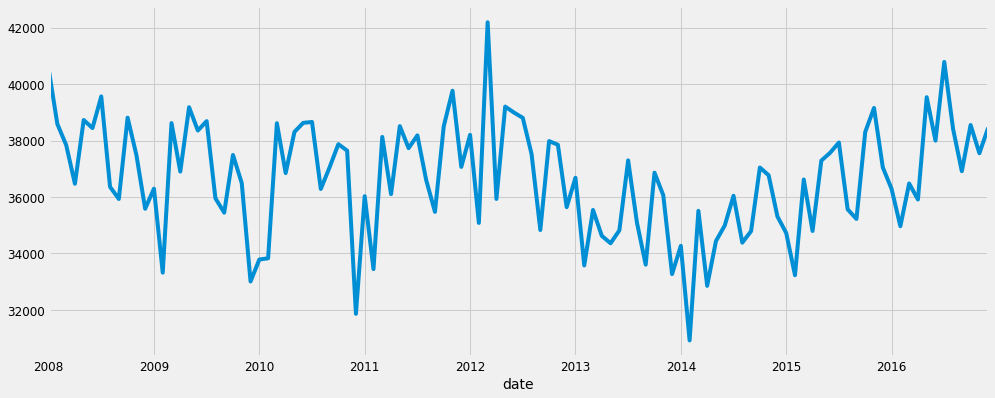

In [111]:
# Cantidad de crímenes en el tiempo.
y= data['value']
y.replace('D')
y.mean()
y.plot(figsize=(15, 6))
plt.show()

Como se muestra en el gráfico, los crímenes están constamente subiendo y bajando, sin embargo después del 2014 se inicia una tendencia a subir.

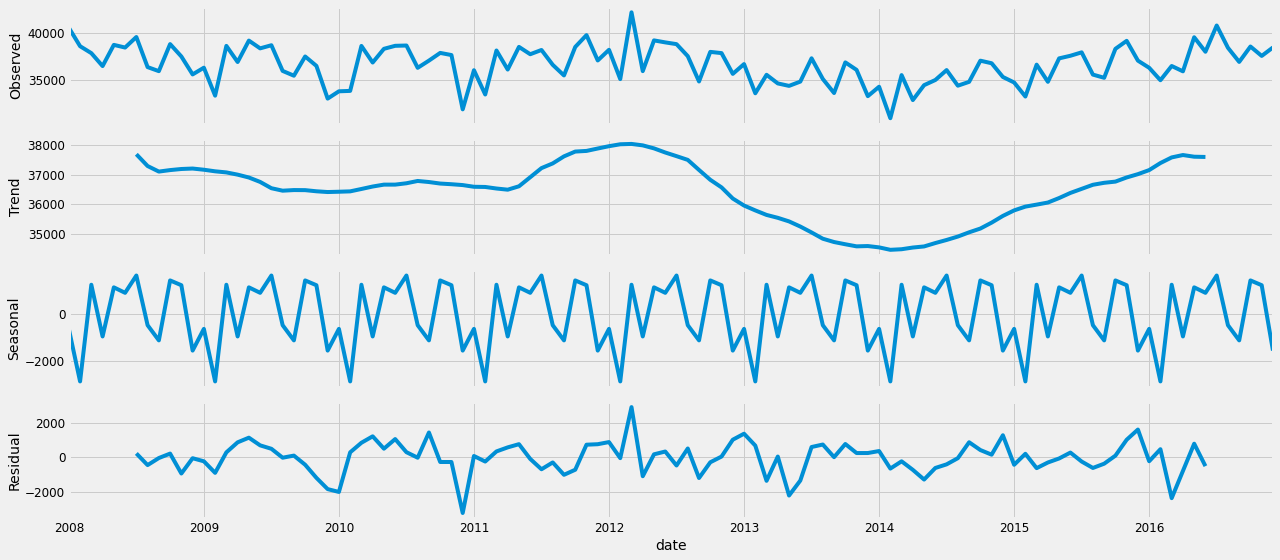

In [112]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Modelo de Machine Learning

In [113]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [114]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2554.8020326271967
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2206.900694272831
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1704.939491788762
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1490.1156604626647
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1728.7007426507357
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1705.6495353501298
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1509.016510789702
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1487.8294445380807
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2458.8173478784074
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2165.4259214484623
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1659.4559223647639
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1452.8821117783034
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2200.4110270924716
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1662.4939938226646
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1490.91384199817
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1454.0540639091366
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1946.406101755256
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1691.3708826381019
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC

In [115]:
mod = sm.tsa.statespace.SARIMAX(y,
                                #order=(1, 1, 1),  #original
                                #seasonal_order=(1, 1, 0, 12), #original
                                order=(1, 1, 1),#
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0967      0.202     -0.480      0.631      -0.492       0.298
ma.L1         -0.4963      0.169     -2.939      0.003      -0.827      -0.165
ar.S.L12      -0.3756      0.133     -2.827      0.005      -0.636      -0.115
sigma2       1.97e+06   2.95e+05      6.682      0.000    1.39e+06    2.55e+06


## Evaluación

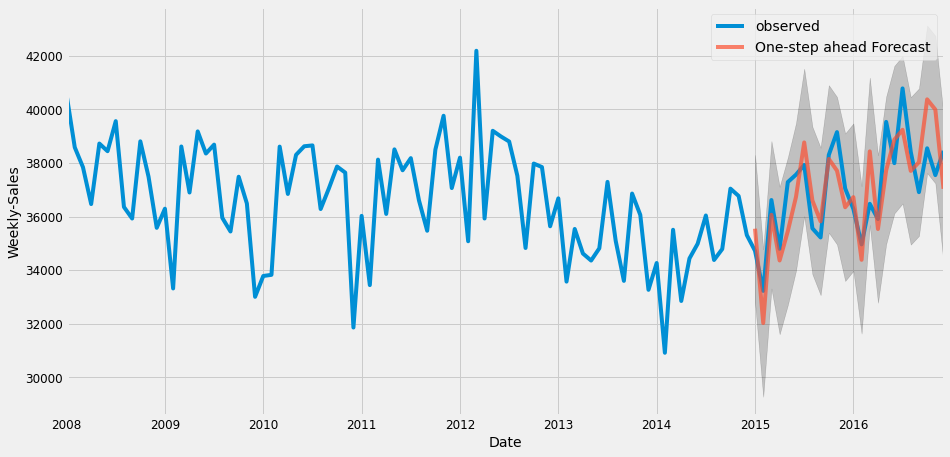

In [116]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2008':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly-Sales')
plt.legend()
plt.show()

In [117]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1473486.83


In [118]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1213.87


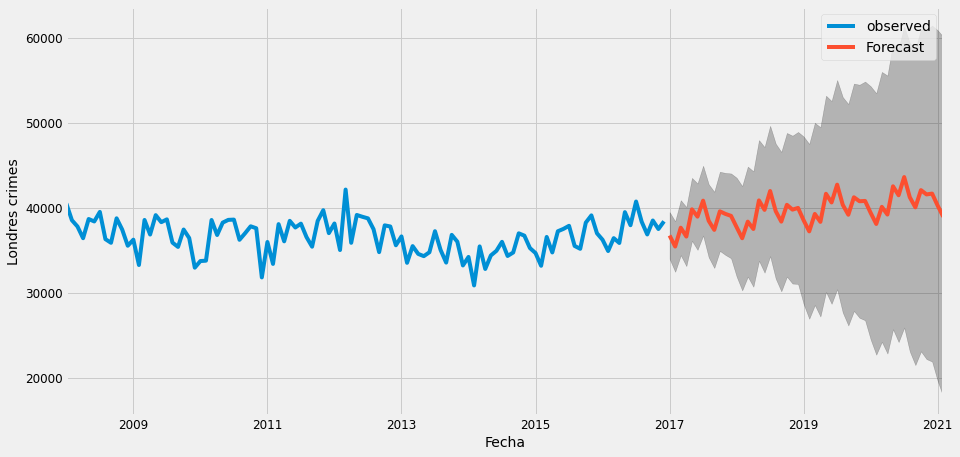

In [119]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Londres crimes')
plt.legend()
plt.show()

In [120]:
pred_uc

In [88]:
results

In [121]:
pred_uc.predicted_mean

2017-01-31    36789.415233
2017-02-28    35495.527842
2017-03-31    37705.031251
2017-04-30    36666.570964
2017-05-31    39865.720406
2017-06-30    39009.382063
2017-07-31    40886.632144
2017-08-31    38519.007787
2017-09-30    37452.542928
2017-10-31    39631.734472
2017-11-30    39326.659476
2017-12-31    39099.579424
2018-01-31    37774.350962
2018-02-28    36469.529845
2018-03-31    38417.825369
2018-04-30    37556.054276
2018-05-31    40914.763419
2018-06-30    39802.415691
2018-07-31    42021.713068
2018-08-31    39653.947633
2018-09-30    38423.159166
2018-10-31    40399.097214
2018-11-30    39832.655995
2018-12-31    40029.996324
2019-01-31    38577.316950
2019-02-28    37276.602177
2019-03-31    39322.998671
2019-04-30    38394.869009
2019-05-31    41693.652850
2019-06-30    40677.453709
2019-07-31    42768.289529
2019-08-31    40400.577078
2019-09-30    39231.503078
2019-10-31    41283.776361
2019-11-30    40815.495579
2019-12-31    40853.437767
2020-01-31    39448.624705
2

In [86]:
pred_ci

lower value   upper value
2017-01-31  34038.151064  39540.679402
2017-02-28  32525.075356  38465.980328
2017-03-31  34471.481184  40938.581318
2017-04-30  33195.349892  40137.792036
2017-05-31  36171.585965  43559.854848
...                  ...           ...
2024-12-31  -3382.379912  93631.809465
2025-01-31  -5741.295227  93154.765779
2025-02-28  -7753.934591  92563.739604
2025-03-31  -6454.218120  95303.398045
2025-04-30  -8072.373309  95101.427570

[100 rows x 2 columns]

In [128]:
import pickle    
with open('crimenesPrueba.pkl','wb') as f:
  pickle.dump(results,f)

In [122]:
import pickle
filename = 'crimen_londres'
pickle.dump(results, open(filename, 'wb'))

In [126]:
import pandas as pd # Librería de tratamiento de datos

import pickle
# load the model from disk
loaded_model = pickle.load(open("/content/crimen_londres", 'rb'))
a = loaded_model.get_forecast(steps=50)
a.predicted_mean

2017-01-31    36789.415233
2017-02-28    35495.527842
2017-03-31    37705.031251
2017-04-30    36666.570964
2017-05-31    39865.720406
2017-06-30    39009.382063
2017-07-31    40886.632144
2017-08-31    38519.007787
2017-09-30    37452.542928
2017-10-31    39631.734472
2017-11-30    39326.659476
2017-12-31    39099.579424
2018-01-31    37774.350962
2018-02-28    36469.529845
2018-03-31    38417.825369
2018-04-30    37556.054276
2018-05-31    40914.763419
2018-06-30    39802.415691
2018-07-31    42021.713068
2018-08-31    39653.947633
2018-09-30    38423.159166
2018-10-31    40399.097214
2018-11-30    39832.655995
2018-12-31    40029.996324
2019-01-31    38577.316950
2019-02-28    37276.602177
2019-03-31    39322.998671
2019-04-30    38394.869009
2019-05-31    41693.652850
2019-06-30    40677.453709
2019-07-31    42768.289529
2019-08-31    40400.577078
2019-09-30    39231.503078
2019-10-31    41283.776361
2019-11-30    40815.495579
2019-12-31    40853.437767
2020-01-31    39448.624705
2

## Resultados

Para empezar, el set de datos es muy bueno, alimenta muy bien el modelo ya que es bastante información y de calidad. Ahora bien, basándonos en los resultados obtenidos de la predicción, al inicio parece que la cantidad de crímenes se mantiene bastante constante sin embargo sí tienen una tendencia a incrementar.